# Creating a Customised Line Chart with Matplotlib in Python

In this tutorial, we will walk through the process of creating a customized line chart using Matplotlib in Python. We'll visualize the closing prices of Microsoft stock, highlighting key points like the maximum and minimum prices, and adding various customizations to enhance readability and presentation.

## Prerequisites

Before we begin, ensure you have the required libraries installed. 

In [2]:
import numpy as np
import pandas as pd
import os
from functions import *


import yfinance as yf
import datetime as dt

In [3]:
import matplotlib.pyplot as plt

In [4]:
_start = dt.date(2019,1,1)
_end = dt.date(2024,12,31)
ticker = 'MSFT'
df = yf.download(ticker, start = _start, end = _end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   99.550003  101.750000   98.940002  101.120003   95.501320   
2019-01-03  100.099998  100.190002   97.199997   97.400002   91.988022   
2019-01-04   99.720001  102.510002   98.930000  101.930000   96.266312   
2019-01-07  101.639999  103.269997  100.980003  102.059998   96.389099   
2019-01-08  103.040001  103.970001  101.709999  102.800003   97.087975   
...                ...         ...         ...         ...         ...   
2024-12-23  436.739990  437.649994  432.829987  435.250000  435.250000   
2024-12-24  434.649994  439.600006  434.190002  439.329987  439.329987   
2024-12-26  439.079987  440.940002  436.630005  438.109985  438.109985   
2024-12-27  434.600006  435.220001  426.350006  430.529999  430.529999   
2024-12-30  426.059998  427.549988  421.899994  424.829987  424.829987   

              Volume  
Date                  
2019-01-02  35329300  
2019-01-03  42579100  
2019-01-04  44060600  
2019-01-07  35656100  
2019-01-08  31514400  
...              ...  
2024-12-23  19152500  
2024-12-24   7164500  
2024-12-26   8194200  
2024-12-27  18117700  
2024-12-30  13158700  

[1509 rows x 6 columns]

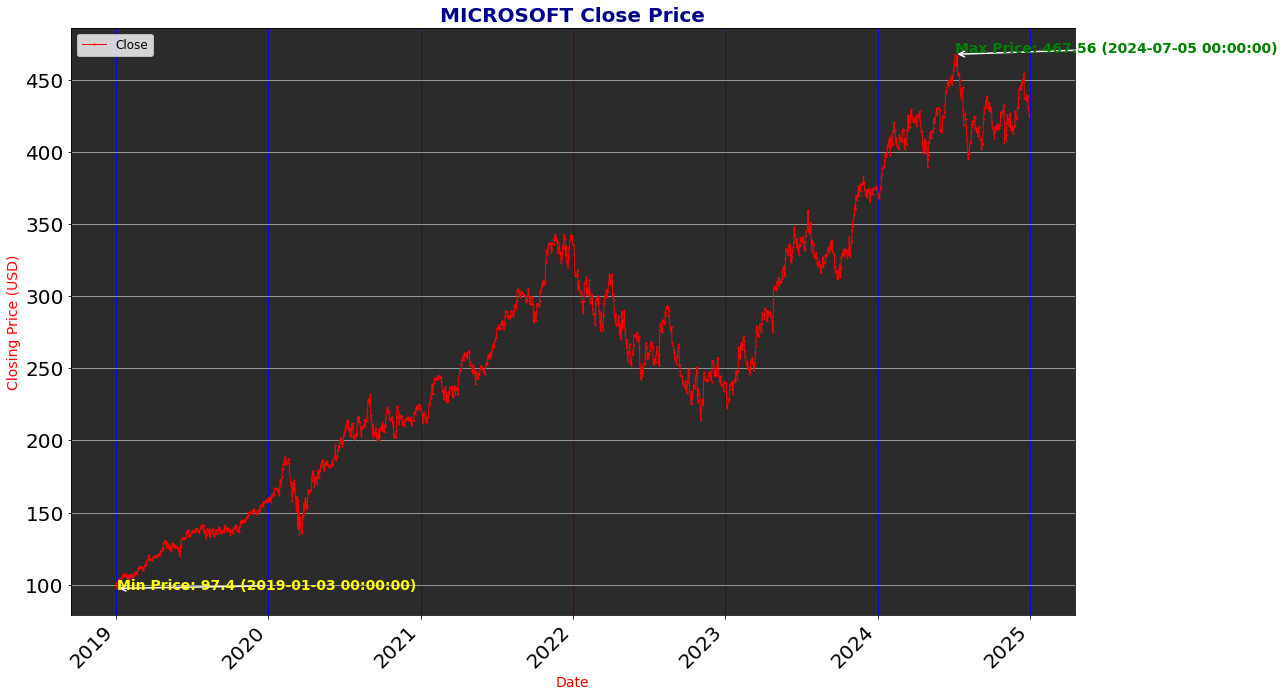

In [60]:
#Plot the series
df['Close'].plot(figsize=(18,12), color='red', linestyle='-', marker='o', linewidth=1, markersize=1)

# Set background color for the plot area
plt.gca().set_facecolor('#2b2b2b')  # Dark gray background

# Add titles and labels with custom fonts and colors:
plt.title('MICROSOFT Close Price', fontsize=20, color='darkblue', weight='bold')
plt.ylabel('Closing Price (USD)', fontsize=14, color='red')
plt.xlabel('Date', fontsize=14, color='red')

# Add legend for better interpretation
plt.legend(fontsize=12, loc='upper left')

# Find the maximum 
max_rate = df['Close'].max()  # Maximum rate

# Get the corresponding years for max and min rates
max_year = df[df['Close'] == max_rate].index[0]  # Year of max rate

max_rate = round(max_rate, 2)  # Round to 2 decimal places

# Annotate the maximum point with both price and year
plt.annotate(f'Max Price: {max_rate} ({max_year})', 
             xy=(max_year, max_rate), 
             xytext=(max_year, max_rate + 1), 
             arrowprops=dict(color='white', arrowstyle="->", lw=1.5),
             fontsize=14, color='green', weight='bold')

# Highlight minimum value
min_rate = df['Close'].min()  # Minimum rate
min_year = df[df['Close'] == min_rate].index[0]  # Year of min price
min_rate = round(min_rate, 2)  # Round to 2 decimal places

plt.annotate(f'Min Price: {min_rate} ({min_year})', 
             xy=(min_year, min_rate), 
             xytext=(min_year, min_rate - 1), 
             arrowprops=dict(color='white', arrowstyle="->", lw=1.5),
             fontsize=14, color='yellow', weight='bold')

# Rotate x-ticks for better readability and adjust font size
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)


# Add gridlines to make the chart easier to read:
plt.grid(axis='x', color='blue') 
plt.grid(axis='y') 


# Exporting the chart as an image file
plt.savefig('linechart.png')




plt.show()


This tutorial demonstrated how to create a fully customized line chart using Matplotlib in Python. We covered adding annotations, customizing colors, and enhancing readability. With these techniques, you can create visually appealing plots to analyze and present your data effectively.

In [ ]:
import subprocess
import os



def run_command(command):
    """Run a shell command and handle errors."""
    try:
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        print(result.stdout)
    except subprocess.CalledProcessError as e:
        print(f"Error: {e.stderr}")
        exit(1)

repo_url = "https://github.com/sisqodataclub/ml-ds.git"  # Change this!
#run_command(f" git clone {repo_url}")
run_command("git fetch origin")
run_command("git reset --hard origin/main")

In [ ]:


# Define the notebook filename and repository
notebook_filename = "Line_Chart.ipynb"

# Git commands to push the Jupyter Notebook
commands = [
    "git init",
    f"git add {notebook_filename}",
    'git commit -m "Added Jupyter Notebook"',
    f"git remote add origin {repo_url}",
    "git branch -M main",
    "git push -u origin main"
]

for command in commands:
    run_command(command)

print("✅ Jupyter Notebook successfully pushed to GitHub!")
